In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

In [3]:
train_y = pd.read_csv('./data/train.csv')
train_y=train_y.nerdiness
train_y.drop(columns='index',inplace=True)

In [5]:
df_train = pd.DataFrame(train.columns)
pd.set_option('display.max_rows', 10000)


del_list = ['index', 'country','introelapse', 'testelapse','surveyelapse','age','familysize']
for i in del_list:
    test.drop(labels=i, axis=1, inplace=True)
    train.drop(labels=i, axis=1, inplace=True)


In [6]:
train.drop(labels='nerdiness', axis=1, inplace=True)

test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,education,urban,gender,engnat,hand,religion,orientation,voted,married,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,3,2.0,2.0,1.0,4.0,4.0,1.0,1.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,2.0,2,1.0,1.0,1.0,1.0,5.0,2.0,1.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,1.0,3,2.0,2.0,1.0,4.0,5.0,2.0,1.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,3,2.0,2.0,1.0,4.0,5.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,3,2.0,2.0,3.0,10.0,4.0,2.0,1.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,2.0,2,3.0,1.0,3.0,2.0,5.0,2.0,1.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,3.0,3,1.0,1.0,1.0,1.0,5.0,1.0,1.0,2.0
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,2.0,3,1.0,1.0,1.0,12.0,1.0,2.0,1.0,2.0


# train data preprocessing

결측치 확인

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
test.isnull().sum()
# 200 넘는 것들: country, education, religion, orientation, family size, ASD, Q10

Q1             119
Q2             147
Q3             130
Q4             125
Q5              90
Q6             132
Q7             142
Q8             108
Q9             104
Q10            220
Q11            119
Q12            149
Q13             96
Q14            102
Q15            107
Q16             85
Q17             79
Q18            147
Q19             97
Q20            119
Q21            123
Q22             82
Q23            114
Q24            125
Q25            108
Q26            108
TIPI1          107
TIPI2          122
TIPI3          163
TIPI4          138
TIPI5          140
TIPI6          128
TIPI7          134
TIPI8          127
TIPI9          130
TIPI10         176
VCL1             0
VCL2             0
VCL3             0
VCL4             0
VCL5             0
VCL6             0
VCL7             0
VCL8             0
VCL9             0
VCL10            0
VCL11            0
VCL12            0
VCL13            0
VCL14            0
VCL15            0
VCL16            0
education   

In [9]:
train = train.fillna(train.mean())


In [10]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,hand,religion,orientation,voted,married,ASD
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,2.0,12.0,4.0,2.0,1.0,2.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,2.0,12.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,1.0,12.0,4.0,2.0,2.0,1.0


train["country"] = train["country"].astype(int)

In [11]:
# int 자료형 float로
# VCL1 ~ VCL16, urban, age

for i in range(1, 17):
    train['VCL'+str(i)] = train['VCL'+str(i)].astype(np.float64)
train['urban']=train['urban'].astype(np.float64)
# train['age']=train['age'].astype(np.float64)

# test data preprocessing

In [12]:
test = test.fillna(test.mean())

In [14]:
#train = train.drop(['index', 'country'],axis = 1)
#test =test.drop(['index', 'country'],axis = 1)

In [15]:
# int 자료형 float로
# VCL1 ~ VCL16, urban, age

for i in range(1, 17):
    test['VCL'+str(i)] = test['VCL'+str(i)].astype(np.float64)
test['urban']=test['urban'].astype(np.float64)
# test['age']=test['age'].astype(np.float64)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35452 entries, 0 to 35451
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Q1           35452 non-null  float64
 1   Q2           35452 non-null  float64
 2   Q3           35452 non-null  float64
 3   Q4           35452 non-null  float64
 4   Q5           35452 non-null  float64
 5   Q6           35452 non-null  float64
 6   Q7           35452 non-null  float64
 7   Q8           35452 non-null  float64
 8   Q9           35452 non-null  float64
 9   Q10          35452 non-null  float64
 10  Q11          35452 non-null  float64
 11  Q12          35452 non-null  float64
 12  Q13          35452 non-null  float64
 13  Q14          35452 non-null  float64
 14  Q15          35452 non-null  float64
 15  Q16          35452 non-null  float64
 16  Q17          35452 non-null  float64
 17  Q18          35452 non-null  float64
 18  Q19          35452 non-null  float64
 19  Q20 

In [17]:
train_x = train
train_x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,hand,religion,orientation,voted,married,ASD
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,12.0,4.0,2.0,1.0,2.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,12.0,4.0,2.0,2.0,1.0


# Training

In [18]:
lgbm_clf = LGBMClassifier(
            n_estimators=1000
        )
lgbm_clf.fit(train_x, train_y)
lgbm_pred_train = lgbm_clf.predict(train_x)
lgbm_proba = lgbm_clf.predict_proba(train_x)

lgbm_pred = lgbm_clf.predict(test)

In [19]:
print(mean_absolute_error(train_y, lgbm_pred_train))

0.0015333333333333334


In [20]:
print(lgbm_proba)

[[0.00848913 0.99151087]
 [0.07858344 0.92141656]
 [0.01863757 0.98136243]
 ...
 [0.01227747 0.98772253]
 [0.91415229 0.08584771]
 [0.05951879 0.94048121]]


In [21]:
accuracy = accuracy_score(train_y, lgbm_pred_train)
print(accuracy)

0.9984666666666666


In [23]:
submission = pd.read_csv('./data/sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [24]:
submission["nerdiness"] = lgbm_pred

In [25]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [26]:
submission.to_csv("./submit/result.csv", index = False)

# 혹시 몰라서 상관관계 분석

<AxesSubplot: >

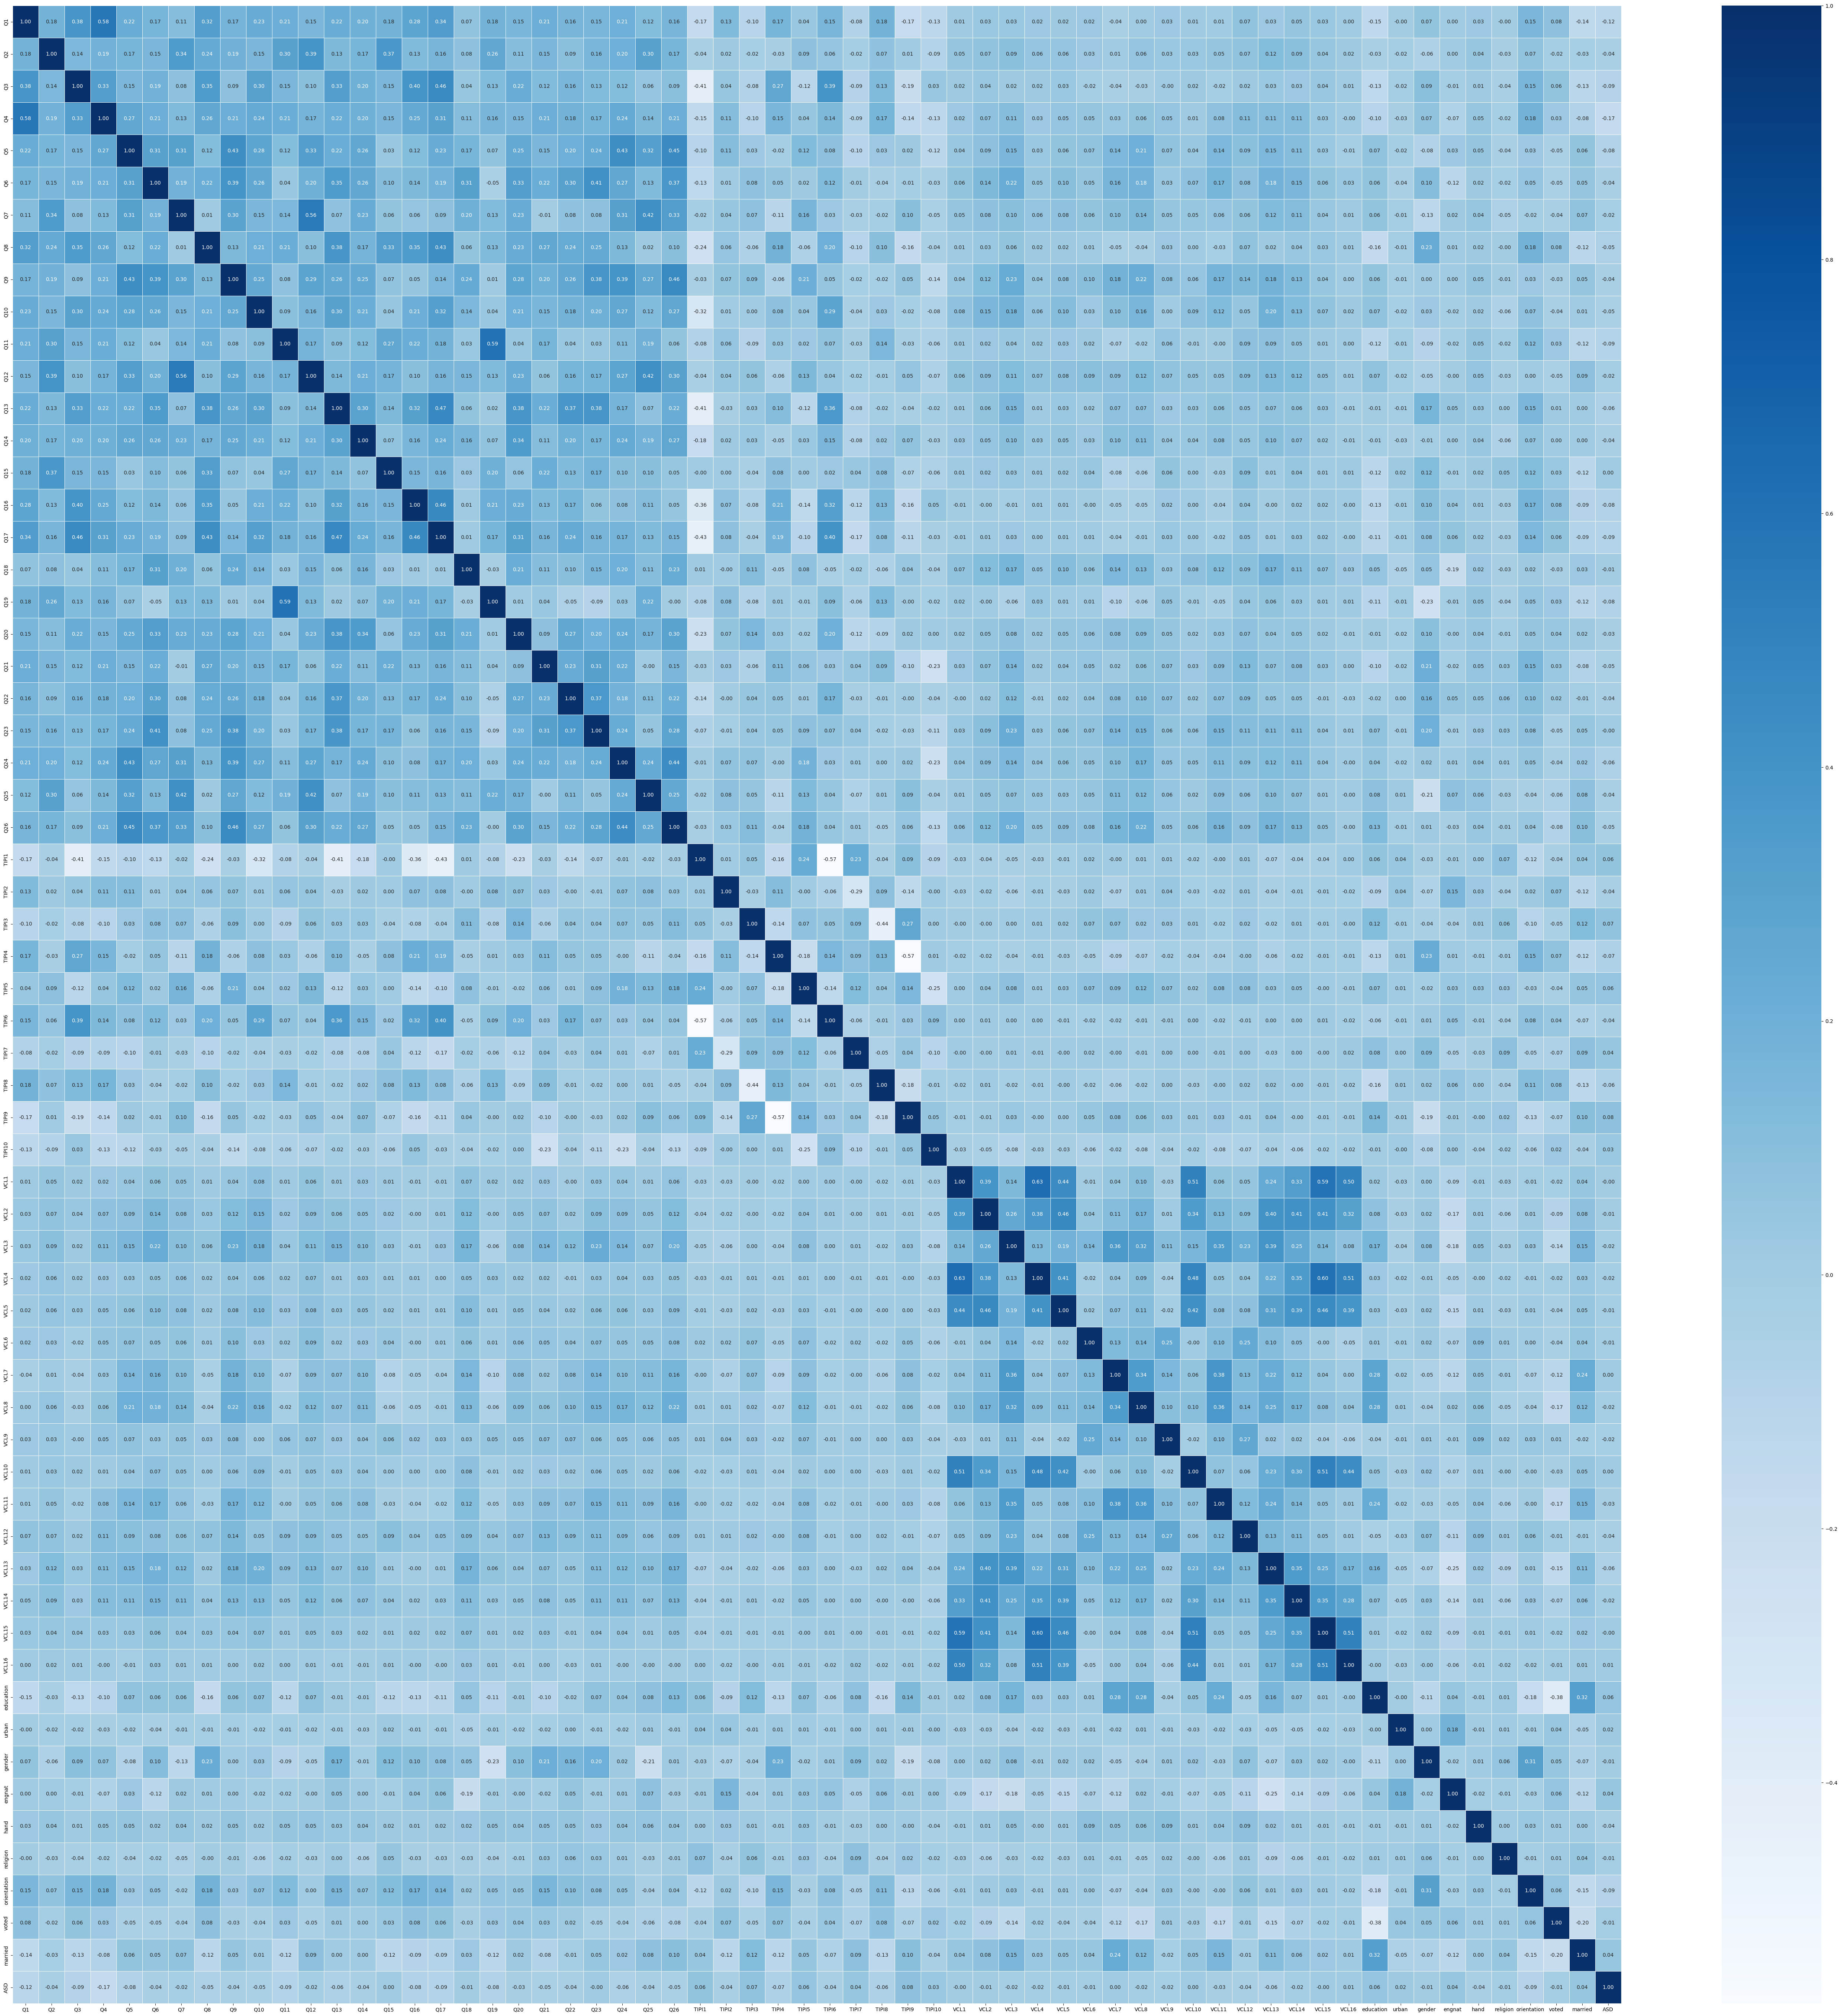

In [27]:
from pandas.plotting import scatter_matrix
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns    

data_ = train.corr()

plt.figure(figsize=(70,70))
sns.heatmap(data = data_, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
